# PCA on Olevitti Images

In [1]:
from sklearn import datasets

In [2]:
oliv=datasets.fetch_olivetti_faces()

In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oliv["data"].shape, oliv["images"].shape

((400, 4096), (400, 64, 64))

In [5]:
import matplotlib.pyplot as plt

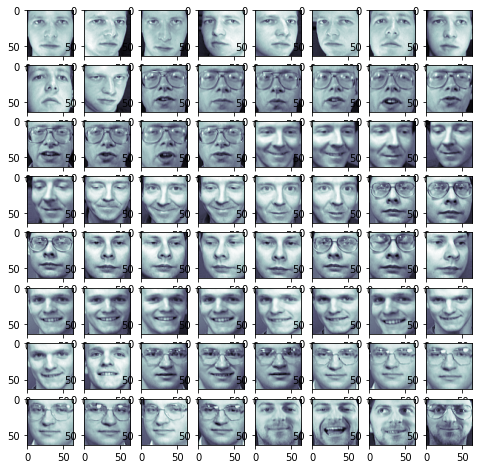

In [6]:
fig=plt.figure(figsize=(8,8)) #should be in this cell
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone) 
plt.show()

In [7]:
x=oliv.data
y=oliv.target

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca=PCA()

In [10]:
pca.fit(x)

PCA()

In [11]:
k=0
total=sum(pca.explained_variance_)
currentSum=0
while currentSum/total<0.99:
    currentSum+=pca.explained_variance_[k]
    k=k+1
k

260

In [12]:
pca=PCA(n_components=k)
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 260)

# Reproducing Images:

In [13]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [14]:
x_approx_images=x_approx.reshape((400,64,64))

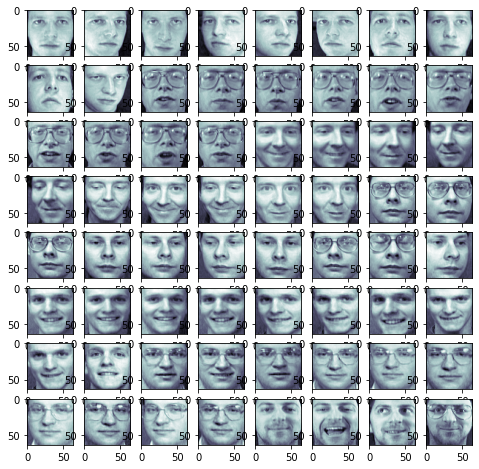

In [15]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

# Eigen faces:

In [16]:
eigenv=pca.components_
eigenv.shape

(260, 4096)

In [17]:
eigenfaces=eigenv.reshape((260,64,64))

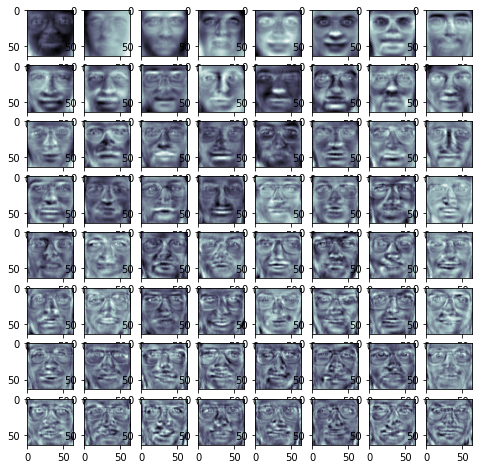

In [18]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()